# Sarcasm Detection for News Headlines

## Imports

In [65]:
import json
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt

## Read News Data

In [66]:
with open("Datasets/sarcasm.json", 'r') as f:
    dataset = json.load(f)

print('Data Sample:', data[0])

Data Sample: {'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


# Preprocessing the Data

In [67]:
training_size = 20000
vocab_size = 10000
max_len = 100
padding_type = 'post'
truncating_type = 'post'
embedding_dim = 16

### Dividing the data

In [68]:
headlines = []
labels = []

for news in data:
    headlines.append(news['headline'])
    labels.append(news['is_sarcastic'])

### Spliting the data

In [69]:
training_data = headlines[:training_size]
training_labels = labels[:training_size]

testing_data = headlines[training_size:]
testing_labels = labels[training_size:]

### Tokenizing

In [70]:
# Create tokenizer object
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')

# Create a word_index dictionary
tokenizer.fit_on_texts(training_data)

# Get word_index dictionary
word_index = tokenizer.word_index

# Tokenize and pad training data
training_sequences = tokenizer.texts_to_sequences(training_data)
training_data_padded = pad_sequences(training_sequences, maxlen = max_len, padding = padding_type, truncating = truncating_type)

# Tokenize and pad testing data
testing_sequences = tokenizer.texts_to_sequences(testing_data)
testing_data_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = truncating_type)

# Convert lists to tensors
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


# Sequence sample
print(training_sequences[:3])

[[328, 1, 799, 3405, 2404, 47, 389, 2214, 1, 6, 2614, 8863], [4, 6840, 3096, 3097, 23, 2, 161, 1, 390, 2842, 6, 251, 9, 889], [153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864]]


## Build the Model

In [71]:
# Define model structure
model = keras.models.Sequential()

# Define Layers
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_len))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(units = 24, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compile Model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

In [72]:
epochs = 30
history = model.fit(x = training_data_padded, y = training_labels, epochs = epochs, validation_data = (testing_data_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 2s 2ms/step - loss: 0.6834 - accuracy: 0.5653 - val_loss: 0.6195 - val_accuracy: 0.7839
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5138 - accuracy: 0.7904 - val_loss: 0.3860 - val_accuracy: 0.8416
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3202 - accuracy: 0.8713 - val_loss: 0.3545 - val_accuracy: 0.8518oss: 0.3250 - accuracy: 0. - ETA: 0s - loss: 0.3234 - accu
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.8988 - val_loss: 0.3477 - val_accuracy: 0.8505
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 0.2250 - accuracy: 0.9153 - val_loss: 0.3462 - val_accuracy: 0.8532
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 0.1949 - accuracy: 0.9267 - val_loss: 0.3823 - val_accuracy: 0.8422
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 0.1734 - accurac

## Display training graph

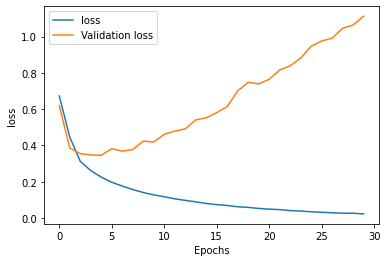

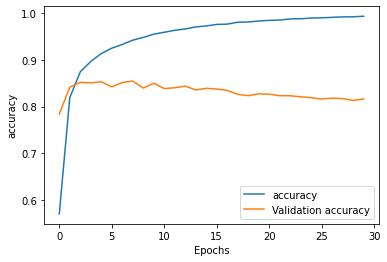

In [73]:
def plot(history, metric):
    plt.plot([i for i in range(epochs)], history.history[metric], label = metric)
    plt.plot([i for i in range(epochs)], history.history['val_' + metric], label = 'Validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
    
plot(history, 'loss')
plot(history, 'accuracy')

## Make a prediction

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))